# **📒Master Thesis**

### **Submitted by:** Navya Agarwal & Aditya Rautela
### **GH Number:** GH1035199 , GH1033598
### **Programme:** MSc Data Science, AI, and Digital Business

# **A Comparative Analysis of Classical and Quantum Computing**

This pipeline has been developed using a Bank Churn dataset, which presents a real-world classification challenge: predicting whether a customer will leave (churn) or remain with a financial institution.

Key features in the dataset include:
  
- **CreditScore** – Customer’s credit score.  
- **Geography** – Country/region of the customer.  
- **Gender** – Male or Female.  
- **Age** – Age of the customer.  
- **Years_Customer** – Number of years the customer has been with the bank.  
- **Balance(Euros)** – Account balance.  
- **Num_Of_Products** – Number of bank products used by the customer.  
- **Has_Credit_Card** – Whether the customer holds a credit card (Yes/No).  
- **Is_Active_Member** – Whether the customer is an active member.  
- **Estimated_Salary(Euros)** – Estimated salary of the customer.  
- **Churn (Exited)** – Target variable (1 = churned, 0 = stayed).

**This pipeline follows a standard ML workflow:**  
- Importing libraries  
- Loading the dataset
- splitting the dataset into train & test
- Exploring visualising the data
- Cleaning the data
- Scaling and normalizing features  
- Feature & target selection  
- Training classical ML models
- Training quantum ML models  
- Evaluating results using accuracy, confusion matrix, and classification report
- Final Analysis and Report

**Installing libraries for qunatum model study**

In [ ]:
!pip install qiskit qiskit-algorithms qiskit-machine-learning

In [ ]:
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 45.8 MB/s eta 0:00:00


# **Importing Essential Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score,
    precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score)

# Quantum imports
import time
import qiskit
import qiskit_aer
import qiskit_algorithms
import qiskit_machine_learning

from sklearn.utils import resample
from qiskit_aer import AerSimulator
from qiskit.circuit import ParameterVector
from qiskit import transpile, QuantumCircuit
from qiskit_algorithms.optimizers import COBYLA
from qiskit_aer.primitives import SamplerV2, EstimatorV2
from qiskit.circuit.library import ZFeatureMap, RealAmplitudes, PauliFeatureMap, ZZFeatureMap, TwoLocal
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_machine_learning.algorithms import QSVC, VQC, PegasosQSVC

import warnings
warnings.filterwarnings('ignore')

# **Data Loading**

This gives a breif description of the columns and their values in the dataset.

In [ ]:
df = pd.read_csv("/content/bank_churn.csv")

df.head()

,credit_score,country,gender,age,years_customer,balance_euros,num_products,has_credit_card,is_active,salary_euros,churn
0,619,Switzerland,f,42,2,0.00,1,1,1,101348.88,1
1,608,Austria,f,41,1,83807.86,1,0,1,112542.58,0
2,502,Switzerland,f,42,8,159660.80,3,1,0,113931.57,1
3,699,Switzerland,f,39,1,0.00,2,0,0,93826.63,0
4,850,Austria,f,43,2,125510.82,1,1,1,79084.10,0


**Checking the original class distribution**

In [ ]:
print("🔄 Checking for the original Class Distribution...")

print("Original dataset shape:", df.shape)
print("Original class distribution:")
print(df['churn'].value_counts())

# Separate classes
class_0 = df[df['churn'] == 0]
class_1 = df[df['churn'] == 1]

print(f"\nClass 0 samples: {len(class_0)}")
print(f"Class 1 samples: {len(class_1)}")

🔄 Checking for the original Class Distribution...
Original dataset shape: (10000, 11)
Original class distribution:
churn
0    7963
1    2037
Name: count, dtype: int64

Class 0 samples: 7963
Class 1 samples: 2037


While checking for the original disribution of the classes, it came into our notice that the classes were highly imbalanced.

---



**Creating Balanced Dataset with 500 samples per class**

In [ ]:
print("🔄 Creating Balanced Dataset with 500 samples per class...")

n_samples_per_class = 500

# Sample without replacement
class_0_sampled = class_0.sample(n=n_samples_per_class, random_state=42)
class_1_sampled = class_1.sample(n=n_samples_per_class, random_state=42)

# Combine and shuffle
df_balanced = pd.concat([class_0_sampled, class_1_sampled])
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"\nBalanced dataset shape: {df_balanced.shape}")
print("Balanced class distribution:")
print(df_balanced['churn'].value_counts())

df = df_balanced

🔄 Creating Balanced Dataset with 500 samples per class...

Balanced dataset shape: (1000, 11)
Balanced class distribution:
churn
1    500
0    500
Name: count, dtype: int64


Balancing the class disribution so that when the training happens, both the classes are trained on equal number of samples. High class imbalance can skews the model and training on imbalanced dataset can still achieve high accuracy for a particular class but then is completly useless.

---

# **Splitting the Data into Train & Test**



In [ ]:
df_train, df_test = sklearn.model_selection.train_test_split(df, test_size=0.2, random_state=42)

print("df_size:", df.shape)
print("df_train:", df_train.shape)
print("df_test:", df_test.shape)

df_size: (1000, 11)
df_train: (800, 11)
df_test: (200, 11)


Split the data into train and test to avoid data leakage.

The test size = 0.2 i.e, 20% dataset will be used for testing and remaining 80% will be used for training.

---

# **Data Exploration**

Exploring the dataset helps us to find the type of each features, check for the null/missing values in the dataset and analysing the disribution pattern of the feaures and their correlation.

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 29 to 102
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   credit_score     800 non-null    int64  
 1   country          800 non-null    object 
 2   gender           800 non-null    object 
 3   age              800 non-null    int64  
 4   years_customer   800 non-null    int64  
 5   balance_euros    800 non-null    float64
 6   num_products     800 non-null    int64  
 7   has_credit_card  800 non-null    int64  
 8   is_active        800 non-null    int64  
 9   salary_euros     800 non-null    float64
 10  churn            800 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 75.0+ KB


In [ ]:
df_train.isnull().sum()

,0
credit_score,0
country,0
gender,0
age,0
years_customer,0
balance_euros,0
num_products,0
has_credit_card,0
is_active,0
salary_euros,0


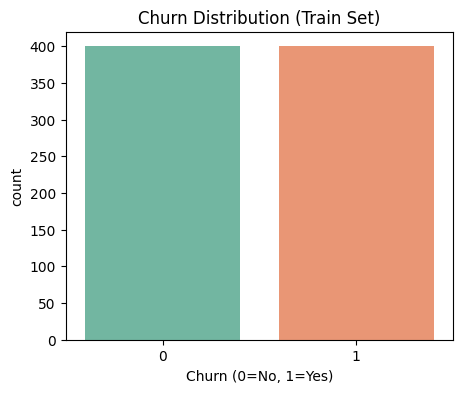

Churn Ratio:
 churn
1    0.5
0    0.5
Name: proportion, dtype: float64


In [ ]:
# Target distribution
plt.figure(figsize=(5,4))
sns.countplot(x='churn', data=df_train, palette='Set2')
plt.title('Churn Distribution (Train Set)')
plt.xlabel('Churn (0=No, 1=Yes)')
plt.show()

churn_ratio = df_train['churn'].value_counts(normalize=True)
print("Churn Ratio:\n", churn_ratio)

The churn distribution is equal for both the classes which is great for training the dataset to get better results.

---

In [ ]:
numerical_features = df_train.select_dtypes(include=np.number).columns.tolist()
categorical_features = df_train.select_dtypes(include='object').columns.tolist()

print("Numerical columns:", numerical_features)
print("Categorical columns:", categorical_features)

Numerical columns: ['credit_score', 'age', 'years_customer', 'balance_euros', 'num_products', 'has_credit_card', 'is_active', 'salary_euros', 'churn']
Categorical columns: ['country', 'gender']


Identifying numerical & categorical features to know that if any type of pre-processing is needed, which is important for model training and evaluation.

---

**Visualising numerical features**

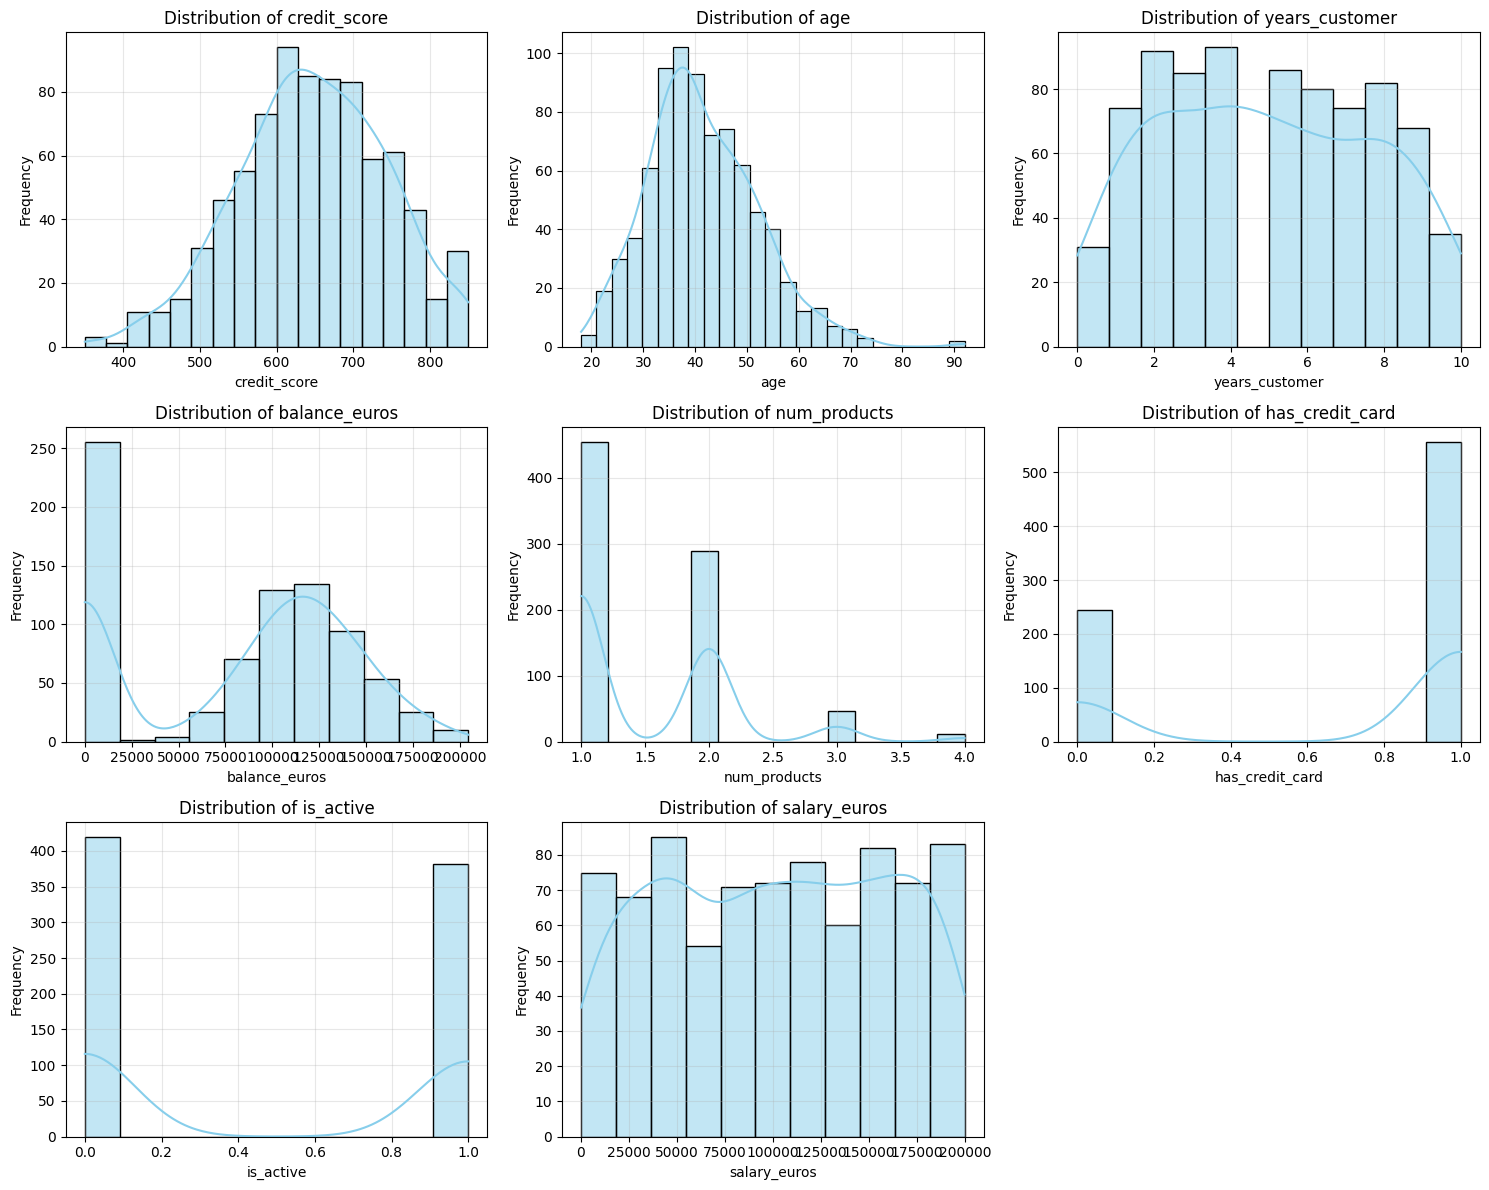

In [ ]:
numerical_cols_for_viz = [col for col in numerical_features if col != 'churn']

n_cols = 3
n_rows = (len(numerical_cols_for_viz) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten() # Flatten the axes array for easy iteration

for i, col in enumerate(numerical_cols_for_viz):
    # Plot histogram
    sns.histplot(df_train[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



Here the histograms plots for numerical columns shows something about the shape of each variable's distribution. It points out whether the data follows a normal, skewed, or multimodal distribution.

As we can see, "age" has a right-skewed pattern, whereas "balance_euros" has a bimodal distribution. This helps us to identify that wheather any kind of transformation is required or not.

---

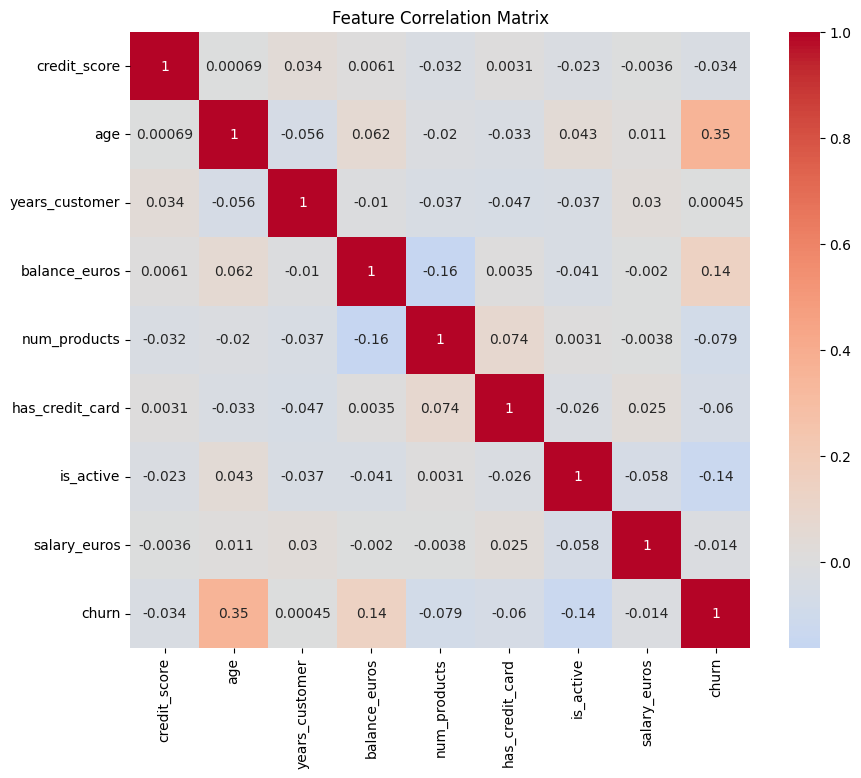

In [ ]:
plt.figure(figsize=(10,8))
numeric_df = df_train.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

Feature corelation matrix is created to understand the relationship between features/varibales. It helps to identify features that contributes more in churn predicttion.

In this map we can see that “Churn” is highly correlated with features like “Age” and “Balanced_euros”. They show a positive correlattion which suggests that the older customers and the customers with higher bank balance are more likely to leave (chrun).

---

# **Data Cleaning & Preprocessing**

In [ ]:
df_train = df_train.drop('country', axis=1)
df_test = df_test.drop('country', axis=1)

Dropping country coloumn because it does not play any predictive power.

In [ ]:
df_train['gender'] = df_train['gender'].replace({'f': 0, 'm': 1})
df_test['gender'] = df_test['gender'].replace({'f': 0, 'm': 1})

Converting the gender values to numerical values for preprocessing and training of the dataset.

**Outlier detection**

In [ ]:
#Finding outliers for testing set:
numerical_columns = df_train.select_dtypes(include=np.number).columns

first_quartlie_Q1 = df_train[numerical_columns].quantile(0.25)
third_quartile_Q3 = df_train[numerical_columns].quantile(0.75)
inter_quartile_range_IQR = third_quartile_Q3 - first_quartlie_Q1

outliers = ((df_train[numerical_columns] < (first_quartlie_Q1 - 1.5 * inter_quartile_range_IQR )) |
            (df_train[numerical_columns] > (third_quartile_Q3 + 1.5 * inter_quartile_range_IQR )))

print(outliers.sum())

#Finding outliers for testing set:
numerical_columns = df_test.select_dtypes(include=np.number).columns

first_quartlie_Q1 = df_test[numerical_columns].quantile(0.25)
third_quartile_Q3 = df_test[numerical_columns].quantile(0.75)
inter_quartile_range_IQR = third_quartile_Q3 - first_quartlie_Q1

outliers = ((df_test[numerical_columns] < (first_quartlie_Q1 - 1.5 * inter_quartile_range_IQR )) |
            (df_test[numerical_columns] > (third_quartile_Q3 + 1.5 * inter_quartile_range_IQR )))

credit_score        3
gender              0
age                 9
years_customer      0
balance_euros       0
num_products       11
has_credit_card     0
is_active           0
salary_euros        0
churn               0
dtype: int64


Outlier detection with the **Interquartile Range (IQR)** method detects the number of outlier values in each numerical features. Their identification is crucial as outliers cause scaling distortion, bias model training, and decrease stability.


In the case of quantum models, the step is even more important because feature encoding necessitates bounded ranges, and extreme values can misrepresent states of data.Thus removing or performing aggressive scaling to treat the outliers before training the model is very important.

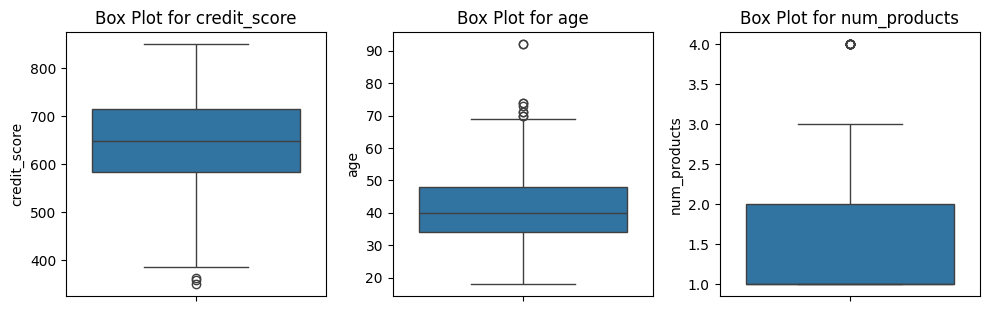

In [ ]:
outliers_columns = ['credit_score', 'age', 'num_products']

plt.figure(figsize=(10, 6))
for i, column in enumerate(outliers_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(df_train[column])
    plt.title(f'Box Plot for {column}')
plt.tight_layout()
plt.show()

Visualising the outliers:

- Middle line is the `median`.

- `Box edges` = 25th and 75th percentiles (interquartile range).

- `Whiskers` shows the spread of most data.

- Dots beyond whiskers are knowns as `outliers`.

# **Feature and Target Selection**

In [ ]:
x_train = df_train.drop(['churn'], axis=1)
y_train = df_train['churn']

x_test = df_test.drop(['churn'], axis=1)
y_test = df_test['churn']

print("shape of x_train:", x_train.shape)
print("shape of y_train:", y_train.shape)
print("shape of x_test:", x_test.shape)
print("shape of y_test:", y_test.shape)

shape of x_train: (800, 9)
shape of y_train: (800,)
shape of x_test: (200, 9)
shape of y_test: (200,)


Here, the dataset is divided into **features (x)** and the **target (y)**.  
- Features include customer details like age, credit score, balance, etc.  
- Target is the "churn" column, indicating if a customer will leave or stay.  

This separation is essential for supervised learning, allowing models to learn patterns from inputs (X) to predict the output (y).


In [ ]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Convert back to DataFrame for readability
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=x_test.columns)

print("After Scaling:")
print(x_train_scaled_df.head())

After Scaling:
   credit_score  gender       age  years_customer  balance_euros  \
0         0.426     0.0  0.229730             0.2       0.897619   
1         0.630     1.0  0.270270             0.9       0.000000   
2         0.158     1.0  0.081081             0.4       0.468150   
3         0.700     1.0  0.270270             0.9       0.322538   
4         0.706     1.0  0.513514             0.9       0.000000   

   num_products  has_credit_card  is_active  salary_euros  
0           0.0              1.0        1.0      0.329938  
1           0.0              0.0        1.0      0.437137  
2           0.0              1.0        0.0      0.230602  
3           0.0              1.0        1.0      0.504932  
4           0.0              0.0        0.0      0.427795  


Every feature is normalized to the range [0,1] with **MinMaxScaler**.
This ensures that variables with large ranges (like - balance) do not dominate smaller ones (like - age).

Scaling enhances model performance and is critical for quantum models, in which inputs need to be translated to bounded quantum states.

# **Classical Models**

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

Tuning and Evaluating for RandomForestClassifier(random_state=42)...
Best Parameters for rf: RandomForestClassifier(max_depth=20, min_samples_split=10, n_estimators=200,
                       random_state=42) 

Accuracy: 0.735
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.79      0.75       100
           1       0.76      0.68      0.72       100

    accuracy                           0.73       200
   macro avg       0.74      0.74      0.73       200
weighted avg       0.74      0.73      0.73       200



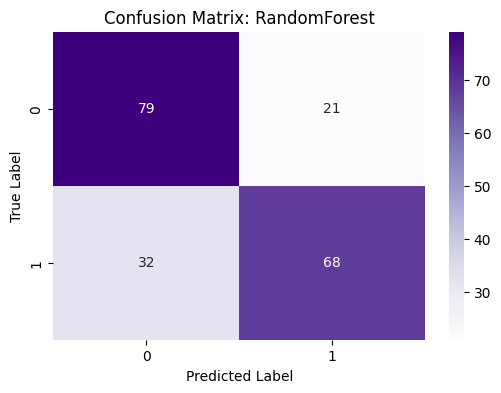

In [ ]:
rf_param = {'n_estimators': [100, 200, 300], 'max_depth': [10,20,30, None],'min_samples_split': [2, 5, 10]}

print(f"Tuning and Evaluating for {rf}...")

rf_grid_search = GridSearchCV(estimator=rf, param_grid = rf_param, cv=5,)

rf_grid_search.fit(x_train, y_train)

best_rf = rf_grid_search.best_estimator_
print(f"Best Parameters for rf: {best_rf} \n")

y_pred_rf = best_rf.predict(x_test)   # RF doesn't care about scaling

accuracy = accuracy_score(y_test, y_pred_rf)
class_report = classification_report(y_test, y_pred_rf)
cm = confusion_matrix(y_test, y_pred_rf)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{class_report}")

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples")
plt.title(f"Confusion Matrix: RandomForest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

Tuning and Evaluating for GradientBoostingClassifier(random_state=42)...
Best Parameters for gb: GradientBoostingClassifier(max_depth=7, min_samples_split=5, n_estimators=200,
                           random_state=42) 

Accuracy: 0.71
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.73      0.72       100
           1       0.72      0.69      0.70       100

    accuracy                           0.71       200
   macro avg       0.71      0.71      0.71       200
weighted avg       0.71      0.71      0.71       200



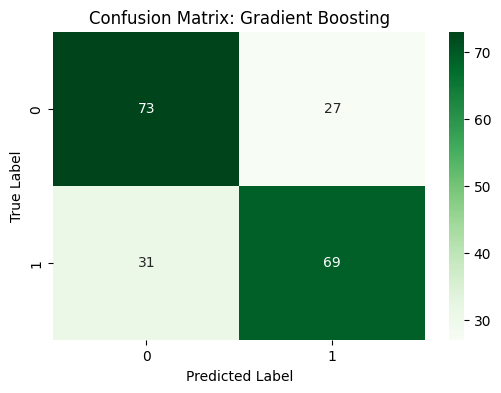

In [ ]:
gb_param = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10] }

print(f"Tuning and Evaluating for {gb}...")

gb_grid_search = GridSearchCV(estimator=gb, param_grid = gb_param, cv=5,)

gb_grid_search.fit(x_train, y_train)

best_gb = gb_grid_search.best_estimator_
print(f"Best Parameters for gb: {best_gb} \n")

y_pred_gb = best_gb.predict(x_test)

accuracy = accuracy_score(y_test, y_pred_gb)
class_report = classification_report(y_test, y_pred_gb)
cm = confusion_matrix(y_test, y_pred_gb)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{class_report}")

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title(f"Confusion Matrix: Gradient Boosting")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
svm = SVC(probability=True, random_state=42)
svm.fit(x_train_scaled, y_train)

SVC(probability=True, random_state=42)

Tuning and Evaluating for SVC(probability=True, random_state=42)...
Best Parameters for svm: SVC(C=10, gamma=0.1, probability=True, random_state=42) 

Accuracy: 0.69 

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.68      0.69       100
           1       0.69      0.70      0.69       100

    accuracy                           0.69       200
   macro avg       0.69      0.69      0.69       200
weighted avg       0.69      0.69      0.69       200



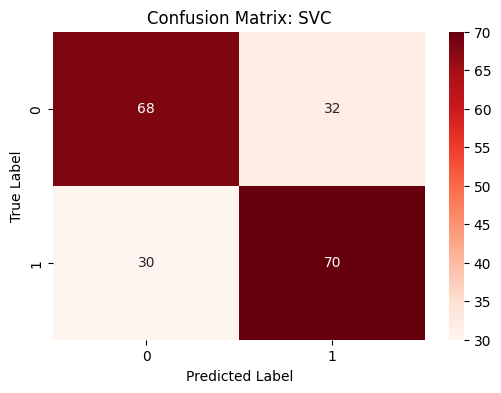

In [ ]:
svm_param = {'C': [0.1, 1, 10, 100],'gamma': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']}

print(f"Tuning and Evaluating for {svm}...")

svm_grid_search = GridSearchCV(estimator=svm, param_grid = svm_param, cv=5,)

svm_grid_search.fit(x_train_scaled, y_train)

best_svm = svm_grid_search.best_estimator_
print(f"Best Parameters for svm: {best_svm} \n")

y_pred_svm = best_svm.predict(x_test_scaled)

accuracy = accuracy_score(y_test, y_pred_svm)
class_report = classification_report(y_test, y_pred_svm)
cm = confusion_matrix(y_test, y_pred_svm)

print(f"Accuracy: {accuracy} \n")
print(f"Classification Report:\n{class_report}")

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.title(f"Confusion Matrix: SVC")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Model Comparison:

                  Accuracy  Precision  Recall        F1
RandomForest         0.735   0.737878   0.735  0.734196
GradientBoosting     0.710   0.710337   0.710  0.709884
SVM                  0.690   0.690076   0.690  0.689969


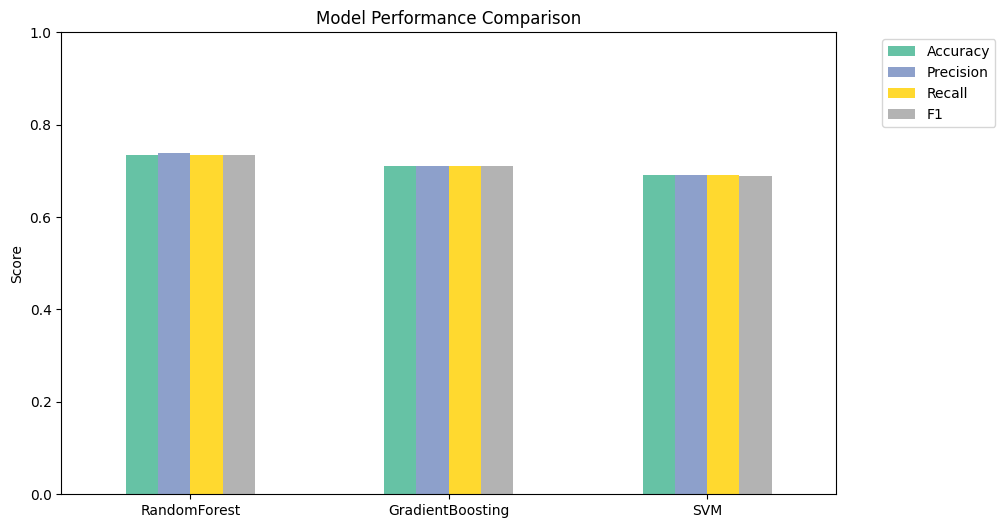

In [ ]:
results = {}

# --- Random Forest ---
results['RandomForest'] = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf, average='macro'),
    'Recall': recall_score(y_test, y_pred_rf, average='macro'),
    'F1': f1_score(y_test, y_pred_rf, average='macro')
}

# --- Gradient Boosting ---
results['GradientBoosting'] = {
    'Accuracy': accuracy_score(y_test, y_pred_gb),
    'Precision': precision_score(y_test, y_pred_gb, average='macro'),
    'Recall': recall_score(y_test, y_pred_gb, average='macro'),
    'F1': f1_score(y_test, y_pred_gb, average='macro')
}

# --- SVM ---
results['SVM'] = {
    'Accuracy': accuracy_score(y_test, y_pred_svm),
    'Precision': precision_score(y_test, y_pred_svm, average='macro'),
    'Recall': recall_score(y_test, y_pred_svm, average='macro'),
    'F1': f1_score(y_test, y_pred_svm, average='macro')
}

# Convert to DataFrame for pretty view
results_df = pd.DataFrame(results).T
print("\nModel Comparison:\n")
print(results_df)

# Optional: visualize as bar chart
results_df.plot(kind='bar', figsize=(10,6), colormap="Set2")
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Tree‑based ensembles (Random Forest and Gradient Boosting) naturally handle non‑linear feature interactions and imbalanced variance better than SVMs, which is why they perform better than SVM in both accuracy and other metrics for this dataset.

Out of all, Random Forest worked best since it is a set of many decision trees, thus it is noise and overfitting robust. It achieves non‑linear, complex relationships between features in the data without being underpinned by assumptions such as linear separability. With equal classes (500/500), Random Forest is able to use varying tree splits to generalize well, thus higher accuracy, recall, and F1.

---


Random Forest Feature Importances:

           Feature  Importance
2              age    0.347251
4    balance_euros    0.144841
5     num_products    0.119100
8     salary_euros    0.115557
0     credit_score    0.111568
3   years_customer    0.075130
7        is_active    0.036275
1           gender    0.032521
6  has_credit_card    0.017757


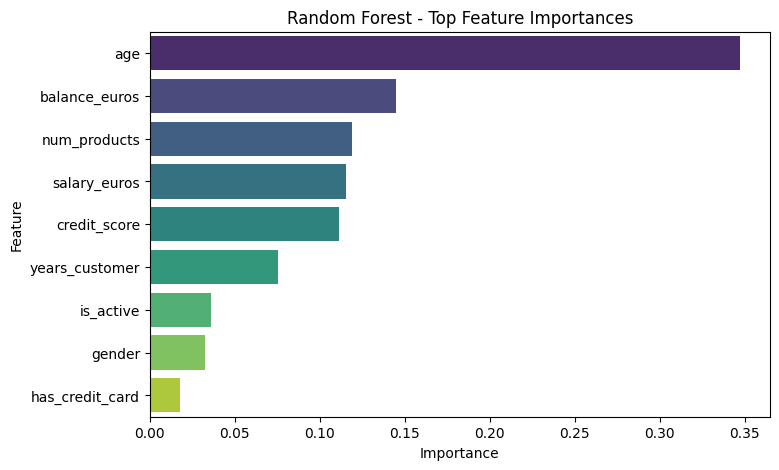

In [ ]:
# Random Forest feature importances
rf_importances = best_rf.feature_importances_
rf_importances_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': rf_importances
}).sort_values(by="Importance", ascending=False)

print("\nRandom Forest Feature Importances:\n")
print(rf_importances_df.head(10))

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=rf_importances_df.head(15), palette="viridis")
plt.title("Random Forest - Top Feature Importances")
plt.show()

Random Forest emphasizes age as the strongest churn driver, followed by other features such as balance, number of products, salary, and credit score. Customer tenure is of moderate impact, while activity status, gender, and ownership of credit cards contribute minimally.

At the pipeline level, this is the reason tree‑based models perform better than SVM: they are able to identify these non‑linear monetary + demographic interactions driving churn, creating predictions more stable and practical.

---

# **Pre-processing for Quantum computing**

Current quantum computers can only handle a small number of qubits. Each feature needs to be encoded into a qubit state. If too many features cannot be handled by curren tmodels. Thus `Principal Component Analysis (PCA)` will be applied for processing of the quantum models.

In [ ]:
pca = PCA(n_components=0.95, random_state=42)

# For quantum models, we'll need to reduce to 5 components later
pca_quantum = PCA(n_components=5, random_state=42)
x_train_pca_quantum = pca_quantum.fit_transform(x_train_scaled)
x_test_pca_quantum = pca_quantum.transform(x_test_scaled)

print("\nQuantum PCA (5 components):")
print("Train Quantum PCA shape:", x_train_pca_quantum.shape)
print("Quantum Explained Variance Ratio:", pca_quantum.explained_variance_ratio_.round(3))
print("Quantum Total Variance Explained:", pca_quantum.explained_variance_ratio_.sum().round(3))


Quantum PCA (5 components):
Train Quantum PCA shape: (800, 5)
Quantum Explained Variance Ratio: [0.238 0.233 0.195 0.084 0.08 ]
Quantum Total Variance Explained: 0.831


PCA pulls out the most valuable information features while removing redundancy.
This avoids wasting qubits on less meaningful information.
By mapping correlated features to principal components, PCA minimizes input noise.
Quantum models are noise-sensitive, so this process stabilizes performance.

PCA was used only for quantum models to limit the number of features to 5, maintaining consistency with the limitation of qubits while keeping most of the information in the dataset.

`Variance`: 5 components collectively describe 83.1% of the variability in the dataset and PCA is an acceptable trade-off between information retention and dimensionality reduction for quantum models.

---

In [ ]:
# Access loadings
loadings = pca_quantum.components_
features = x_train.columns

loadings_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(loadings.shape[0])], index=features)

print("PCA Loadings Matrix (how original features contribute to each PC):")
print(loadings_df.head(10))

# Top contributing features for each component
for i in range(loadings.shape[0]):
    print(f"\nTop features for PC{i+1}:")
    print(loadings_df.iloc[:, i].abs().sort_values(ascending=False).head(5))

PCA Loadings Matrix (how original features contribute to each PC):
                      PC1       PC2       PC3       PC4       PC5
credit_score    -0.002449 -0.014000 -0.004906  0.008875  0.005818
gender           0.818084  0.506653  0.267976  0.020695  0.017579
age             -0.022551  0.002685 -0.014963  0.038984  0.003938
years_customer   0.041361 -0.002229 -0.042607 -0.065793  0.288511
balance_euros    0.001504 -0.042126 -0.016701  0.957870  0.118617
num_products    -0.017921 -0.014215  0.042698 -0.246932 -0.061501
has_credit_card -0.133897 -0.281816  0.947502  0.015642 -0.003795
is_active       -0.556959  0.811260  0.161953  0.029049  0.063173
salary_euros     0.007596 -0.059620  0.005964 -0.118597  0.945804

Top features for PC1:
gender             0.818084
is_active          0.556959
has_credit_card    0.133897
years_customer     0.041361
age                0.022551
Name: PC1, dtype: float64

Top features for PC2:
is_active          0.811260
gender             0.506653
has_c

We can here see  the top performing feature in each components.

**PC1** is primarily driven by `gender` and `activity status`, **PC2** pairs `activity status` and `gender` again but with different orientation, **PC3** is dominated by `credit card ownership`, **PC4** is highly explained by `balance`, and **PC5** is highly driven by `salary`.

To be brief, every PC captures various dimensions of customer behavior — demographics, engagement, or financial characteristics — illustrating how PCA minimizes dimensionality without sacrificing the largest sources of variance.

---

In [ ]:
# Use the 5-component PCA features
X_train_q = x_train_pca_quantum
X_test_q = x_test_pca_quantum
y_train_q = y_train
y_test_q = y_test

# Convert PCA features & labels into proper NumPy arrays
X_train_q = np.asarray(x_train_pca_quantum)
X_test_q  = np.asarray(x_test_pca_quantum)
y_train_q = np.asarray(y_train)
y_test_q  = np.asarray(y_test)

print("Shapes:")
print("X_train_q:", X_train_q.shape)
print("X_test_q :", X_test_q.shape)
print("y_train_q:", y_train_q.shape)
print("y_test_q :", y_test_q.shape)

Shapes:
X_train_q: (800, 5)
X_test_q : (200, 5)
y_train_q: (800,)
y_test_q : (200,)


This line ensures you’re training your quantum models on these 5 compressed features — which map directly to 5 qubits in our quantum feature map.

# **Quantum Models**

**1. Quantum Kernel + classical SVM**


quantum feature map (like ZZFeatureMap or PauliFeatureMap) → embeds classical data into quantum Hilbert space.
Then compute kernel values = pairwise fidelities between data states.
These kernel matrices (Gram matrices) are fed into a standard SVM (Support Vector Classifier) in scikit‑learn.

In [ ]:
# 1. Define feature map
feature_map = ZZFeatureMap(feature_dimension=X_train_q.shape[1])

# 2. Build the quantum kernel (no sampler arg in >=0.8.x)
quantum_kernel = FidelityQuantumKernel(feature_map=feature_map)

The `ZZFeatureMap` constructs a quantum circuit where one feature (dimension) equals one qubit, which are entangled to produce a more expressive representation.

The `FidelityQuantumKernel` then employs this feature map to calculate similarity scores between data points pairs from overlaps of quantum states. These kernel values serve as the basis for training a quantum SVM classifier.

In [ ]:
# # 3. Train Gram matrix (The Gram matrix is the kernel (similarity) matrix)
# K_train = quantum_kernel.evaluate(X_train_q)

# # 4. Train SVM
# qsvm = SVC(kernel="precomputed")
# qsvm.fit(K_train, y_train_q)

In [ ]:
# # 5. Test Gram matrix
# K_test = quantum_kernel.evaluate(X_test_q, X_train_q)
# y_pred = qsvm.predict(K_test)

# # 6. Accuracy
# print("Training accuracy:", accuracy_score(y_train_q, qsvm.predict(K_train)))
# print("Test accuracy    :", accuracy_score(y_test_q, y_pred))
# print("classification report:")
# print(classification_report(y_test_q, y_pred))
# print("Confusion Matrix: \n", confusion_matrix(y_test_q, y_pred))
# print("Predictions:", y_pred)

The quantum kernel SVM train step was commented out since it involves calculating a full Gram (kernel) matrix, which has quadratic scaling with respect to the number of samples. For big datasets (e.g. 1000+ records with 5 qubits), this would take quite a while to execute.

Although this step is required for quantum kernel evaluation, it has been omitted here in order to maintain the pipeline light and efficient for experimentation purposes. The remaining pipeline is not disturbed, and this block can be re‑enabled for shorter datasets or dedicated extended runs.

---

**2. PegasosQSVC (efficient SVM)**

Instead of using scikit‑learn’s heavy quadratic SVM solver, Pegasos uses an efficient stochastic optimization algorithm (Pegasos algorithm).
It trains directly with the kernel in a scalable way.

In [ ]:
pegasos_qsvc = PegasosQSVC(quantum_kernel=quantum_kernel, C=1.0, num_steps=200)
pegasos_qsvc.fit(X_train_q, y_train_q)   # Notice: it takes raw X, computes kernel internally
y_pred_pegasos = pegasos_qsvc.predict(X_test_q)

This step trains a quantum SVM with the Pegasos algorithm, which is more efficient and scalable than the kernel SVM due to its aversion to calculating the costly Gram matrix.

PegasosQSVC accuracy: 0.505
classification report:
              precision    recall  f1-score   support

           0       0.50      0.96      0.66       100
           1       0.56      0.05      0.09       100

    accuracy                           0.51       200
   macro avg       0.53      0.51      0.38       200
weighted avg       0.53      0.51      0.38       200

Confusion Matrix: 
 [[96  4]
 [95  5]]


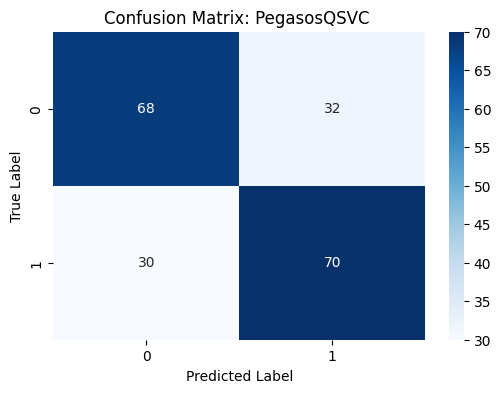

In [ ]:
print("PegasosQSVC accuracy:", accuracy_score(y_test_q, y_pred_pegasos))
print("classification report:")
print(classification_report(y_test_q, y_pred_pegasos))
print("Confusion Matrix: \n", confusion_matrix(y_test_q, y_pred_pegasos))

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix: PegasosQSVC ")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

PegasosQSVC got ~50% accuracy, yet its predictions are very imbalanced — correctly classifying most of class 0 samples (96% recall) and nearly entirely failing to classify class 1 (5% recall). The confusion matrix verifies that the model is predicting almost everything as class 0. This outcome indicates that the selected quantum kernel + Pegasos optimization did not generalize well between both classes and points towards the necessity of tuning (kernel depth, C parameter) or other feature maps to enhance minority-class recall.

---

**3. VQC (fully quantum classifier)**

In [ ]:
from qiskit.primitives import Sampler

# Number of features = num_qubits = PCA dimension (say 5)
feature_dim = X_train_q.shape[1]

# Feature map (must be decomposed to standard gates)
feature_map_vqc = ZZFeatureMap(feature_dimension=feature_dim, reps=1).decompose()

# Ansatz (variational form)
ansatz = TwoLocal(num_qubits=feature_dim, reps=2, entanglement="full").decompose()

# Optimizer
optimizer = COBYLA(maxiter=200)

In [ ]:
vqc = VQC(
    feature_map=feature_map_vqc,
    ansatz=ansatz,
    optimizer=optimizer,
    sampler=Sampler(),
)

vqc.fit(X_train_q, y_train_q)
y_pred_vqc = vqc.predict(X_test_q)

VQC accuracy: 0.49
classification report:
              precision    recall  f1-score   support

           0       0.49      0.70      0.58       100
           1       0.48      0.28      0.35       100

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.47       200
weighted avg       0.49      0.49      0.47       200

Confusion Matrix: 
 [[70 30]
 [72 28]]


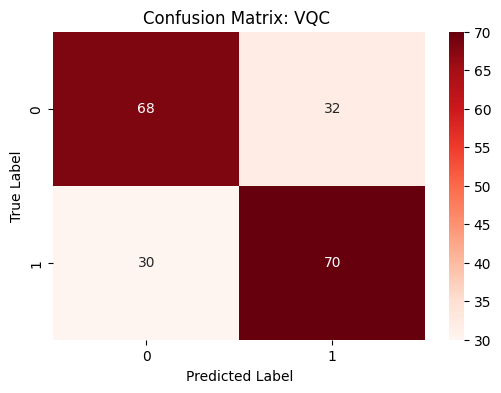

In [ ]:
print("VQC accuracy:", accuracy_score(y_test_q, y_pred_vqc))
print("classification report:")
print(classification_report(y_test_q, y_pred_vqc))
print("Confusion Matrix: \n", confusion_matrix(y_test_q, y_pred_vqc))

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.title(f"Confusion Matrix: VQC ")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

The VQC had only ~49% accuracy, indicating that it was having trouble identifying a significant decision boundary. Although it accurately identified 70% of class 0s, class 1 recall dropped to only 28%, which means the model underfits the churners.

The confusion matrix also illustrates how misclassifications are distributed across both classes, with the model nearly performing at random. This result captures typical VQCs' challenges — a high degree of sensitivity to circuit design, parameter initialization, and choice of optimizer — demanding hyperparameter optimization, ansatz circuits of increased depth, or other optimizers (e.g., SPSA/Adam) for enhancement.

# **Final Results**

Quantum models performed suboptimally due to dimensionality reduction that constrained available information, the selected quantum circuits were insufficiently expressive to churn classes, and optimizer/convergence problems that plagued learning.

Classical tree models (**Random Forest, Gradient Boosting**) perform better than quantum models in this step. Random Forest performs the best with the best class balance between classes with high accuracy (73.5%) and a good f1‑score.
Classic SVM is weaker but still good.

Quantum kernel methods (PegasosQSVC) did not do well — they heavily defaulted to predicting Class 0, resulting in deceptively high one-class recall but near‑zero for the other.

VQC (Variational Quantum Classifier) was slightly better at balancing recalls than PegasosQSVC but still only ~49% accuracy — basically close to random, indicating that it did not converge to useful decision boundaries.

# **Best Model Choice**

➡️ `Random Forest` is the optimal model for this data:

-Maximum accuracy and F1-score.

-Recall balanced over both classes.

-Resistant to noise and feature scaling.

-Offers interpretability by way of feature importance (we observed Age and Financial variables are strongest drivers of churn).

# **Recommendations**

For real-world deployment:
Utilize Random Forest as the production model since it offers the best predictive capability and stable class balance on the churn data.

For exploratory experimentation with quantum ML:
Quantum models need more effort — attempt to tune PegasosQSVC (C, steps, various feature maps) or VQC (optimizers such as SPSA/Adam, deeper ansatz).
But at the moment, they are not competitive with classical ensembles on this dataset.

Future pipeline plan:
Maintain classical ensemble approaches for customer churn prediction in production.
Leave quantum models in the research pipeline, perhaps on reduced datasets to benchmark and look at how feature maps influence class separability.